<a href="https://colab.research.google.com/github/Julia-Vanyarina/data-science/blob/main/%D0%92%D0%B0%D0%BD%D1%8F%D1%80%D0%B8%D0%BD%D0%B0_%D0%AE%D0%BB%D0%B8%D1%8F_04_1_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Задание к лекции 04-1: Линейная регрессия 1

Name: Ванярина Юлия

Email: VanyarinaYA368@mgpu.ru




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [1]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

In [3]:
dose = [0.0] * 8 + [2.5] * 8 + [5.0] * 8
food_consump = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3,
                73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1,
                38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]
amf = pd.DataFrame({'dose': dose, 'food_consump': food_consump})
amf

,dose,food_consump
0,0.0,112.6
1,0.0,102.1
2,0.0,90.2
3,0.0,81.5
4,0.0,105.6
5,0.0,93.0
6,0.0,106.6
7,0.0,108.3
8,2.5,73.3
9,2.5,84.8


In [4]:
amf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dose          24 non-null     float64
 1   food_consump  24 non-null     float64
dtypes: float64(2)
memory usage: 512.0 bytes


In [5]:
amf.describe()

,dose,food_consump
count,24.000000,24.000000
mean,2.500000,76.812500
std,2.085144,21.842685
min,0.000000,38.500000
25%,0.000000,57.700000
50%,2.500000,78.900000
75%,5.000000,90.900000
max,5.000000,112.600000


## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

Linear Equation: Food Intake = 5.658333333333333 + -0.4149999999999998 * Dose
R-squared: 0.6072903045707653


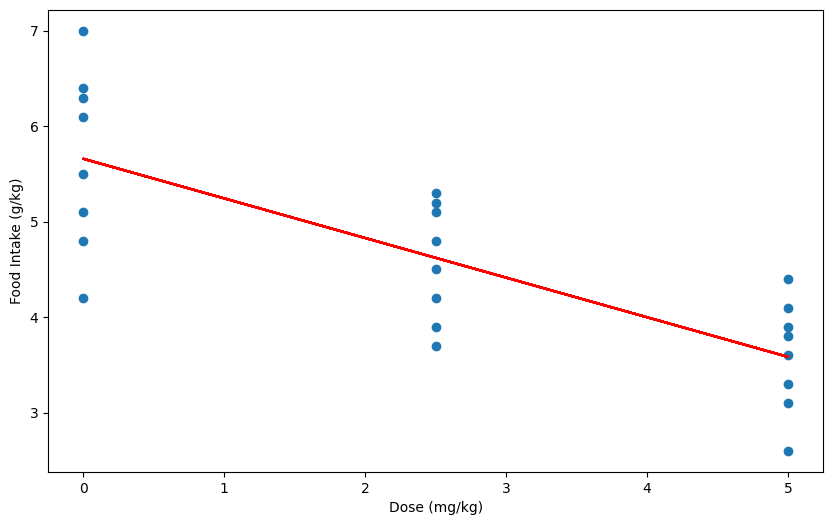

In [7]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Example data
dose = [0, 2.5, 5.0, 0, 2.5, 5.0, 0, 2.5, 5.0, 0, 2.5, 5.0, 0, 2.5, 5.0, 0, 2.5, 5.0, 0, 2.5, 5.0, 0, 2.5, 5.0]
food_intake = [4.2, 3.9, 3.1, 4.8, 3.7, 2.6, 5.1, 4.5, 3.3, 5.5, 4.2, 3.6, 6.1, 4.8, 3.9, 6.3, 5.2, 4.1, 6.4, 5.1, 3.8, 7.0, 5.3, 4.4]

# Build a scatter plot
plt.scatter(dose, food_intake)
plt.xlabel('Dose (mg/kg)')
plt.ylabel('Food Intake (g/kg)')

# Run a linear regression
model = smf.ols(formula='food_intake ~ dose', data={'dose': dose, 'food_intake': food_intake})
results = model.fit()

# Print the linear equation and R-squared value
print('Linear Equation: Food Intake =', results.params[0], '+', results.params[1], '* Dose')
print('R-squared:', results.rsquared)

# Add a trend line to the scatter plot
plt.plot(dose, results.predict(), color='red')
plt.show()

                            OLS Regression Results                            
Dep. Variable:           food_consump   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Fri, 17 May 2024   Prob (F-statistic):           7.27e-08
Time:                        12:16:03   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.3313      3.680     26.994      0.0

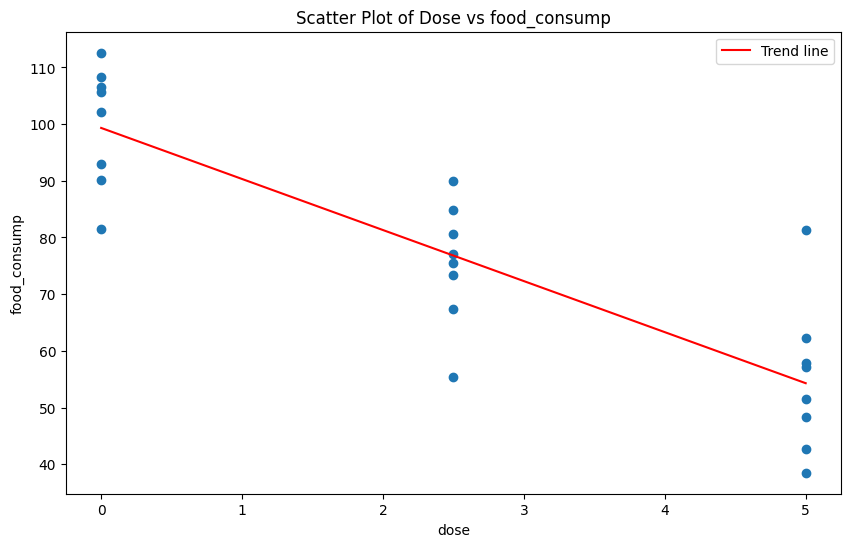

In [6]:
plt.scatter(amf['dose'], amf['food_consump'])
plt.xlabel('dose')
plt.ylabel('food_consump')
plt.title('Scatter Plot of Dose vs food_consump')
X = amf['dose']
y = amf['food_consump']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())
plt.plot(amf['dose'], predictions, color='red', label='Trend line')
plt.legend()
plt.show()


**Ваш ответ:**

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



**Ваш ответ:**


In [10]:
dose_food_ols = sm.OLS(amf['dose'], sm.add_constant(amf['food_consump'])).fit()
dose_food_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dose   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Fri, 17 May 2024   Prob (F-statistic):           7.27e-08
Time:                        12:26:11   Log-Likelihood:                -35.044
No. Observations:                  24   AIC:                             74.09
Df Residuals:                      22   BIC:                             76.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.8052      0.828     10.629      0.000       7.087      10.523
food_consump    -0.0821      0.010     -7.900      0.000      -0.104      -0.061
==============================================================================
Omnibus:                        2.704   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                1.202
Skew:                           0.328   Prob(JB):                        0.548
Kurtosis:                       3.878   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

модель объясняет около 74% вариации дозы



1.   const: 8.8052  ожидаемое значение дозы при нулевом значении food_consump.при отсутствии потребления пищи доза составляет примерно 8,8 единиц.
2.  food_consump: -0,0821 — это коэффициент перед независимой переменной food_consump, который показывает влияние этой переменной на дозу.Отрицательное значение коэффициента означает, что увеличение потребления пищи приводит к уменьшению дозы.



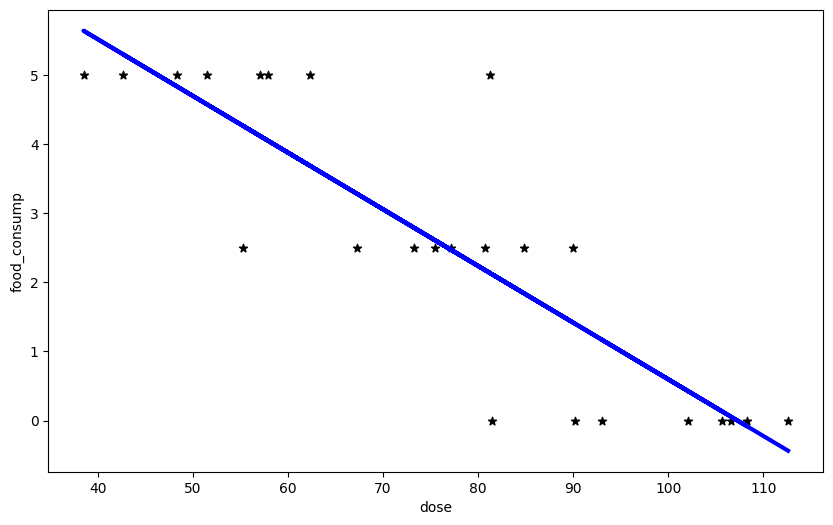

In [12]:
plt.scatter(x=amf['food_consump'],y=amf['dose'],c='k',marker='*',label='food_consump')
plt.plot(amf['food_consump'],dose_food_ols.predict(),color='blue',linewidth=3)

plt.xlabel('dose')
plt.ylabel('food_consump')
plt.show()

                  dose  food_consump
dose          1.000000     -0.859873
food_consump -0.859873      1.000000


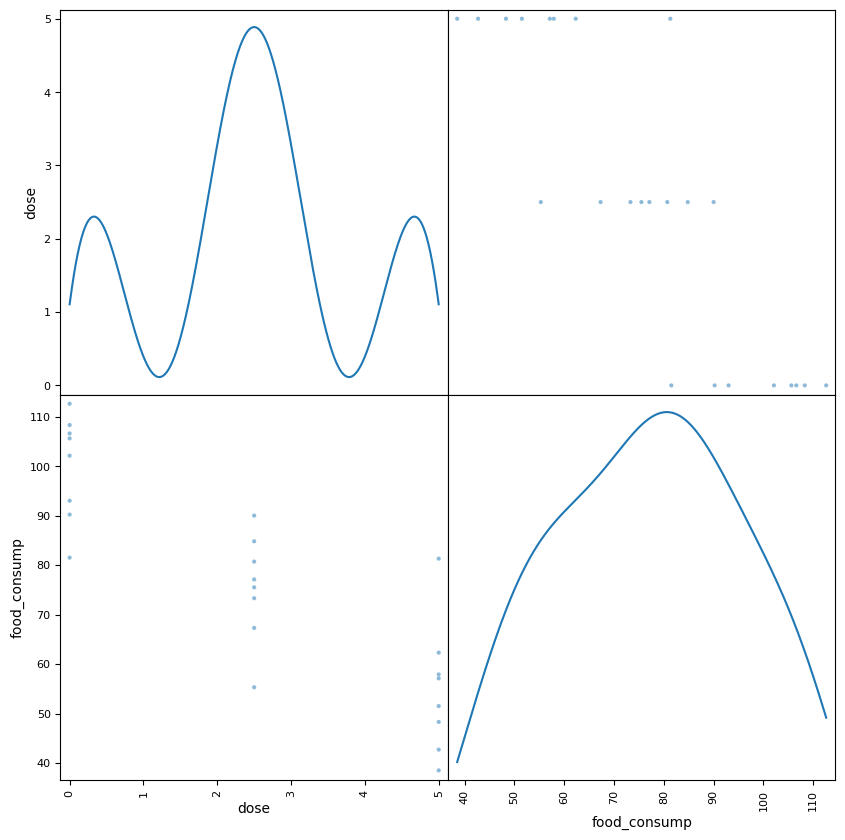

In [13]:
print(amf.corr())
pd.plotting.scatter_matrix(amf, figsize=(10, 10), diagonal='kde')
plt.show()

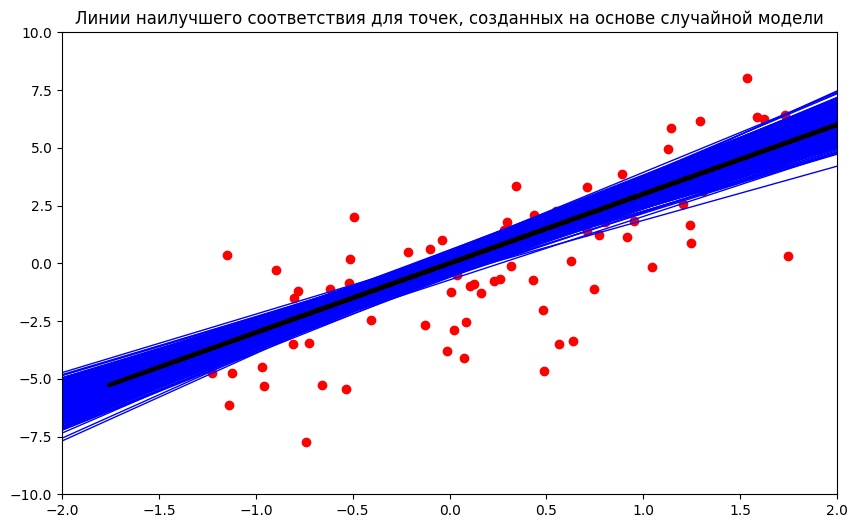

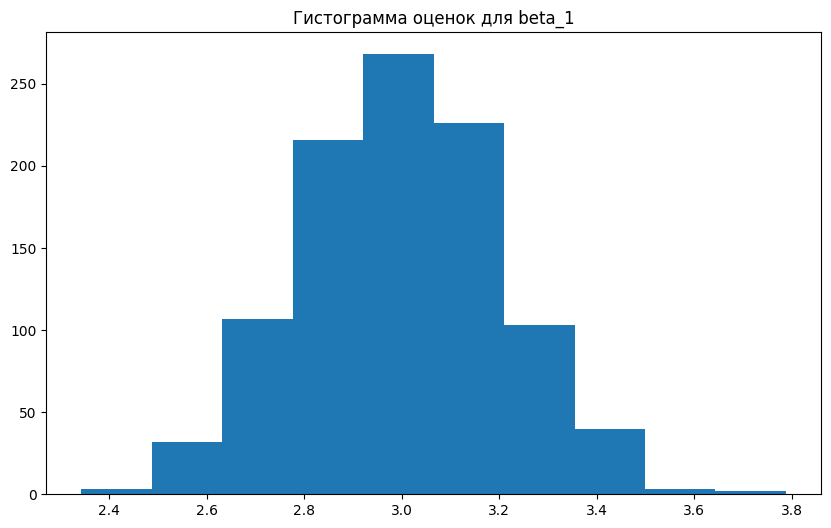

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import linear_model

f = lambda x: 3 * x
x = np.linspace(-2, 2, 3).reshape(3, 1)

plt.figure(0)

sample_size = 100
betaOnes = []
for ii in range(1000):
    xp = norm.rvs(size=sample_size)
    yp = f(xp) + norm.rvs(size=sample_size, scale=2)

    if ii == 0:
        plt.plot(xp, yp, 'ro')

    lr = linear_model.LinearRegression()
    lr.fit(X=xp.reshape(100, 1), y=yp)
    plt.plot(x, lr.predict(x), color='blue', linewidth=1)

    # Собираем коэффициенты наклона
    betaOnes.append(lr.coef_[0])

plt.plot(xp, f(xp), 'k', linewidth=3)
plt.xlim(-2, 2)
plt.ylim(-10, 10)
plt.title('Линии наилучшего соответствия для точек, созданных на основе случайной модели')
plt.show()

plt.figure(1)
plt.hist(betaOnes)
plt.title('Гистограмма оценок для beta_1')
plt.show()

1.  Нулевая гипотеза (H0): нет существенной зависимости между дозировкой препарата, подавляющего аппетит, и количеством потребляемой пищи.
Однако статистические тесты и линейный регрессионный анализ свидетельствуют против этой гипотезы. Отрицательный коэффициент (-0,0821) и низкое значение p (<0,001) указывают на то, что связь между дозировкой и потреблением пищи является существенной и отрицательной.
2.   альтернативная гипотеза (H1) :существует значительная отрицательная зависимость между дозировкой препарата и количеством потребляемой пищи.


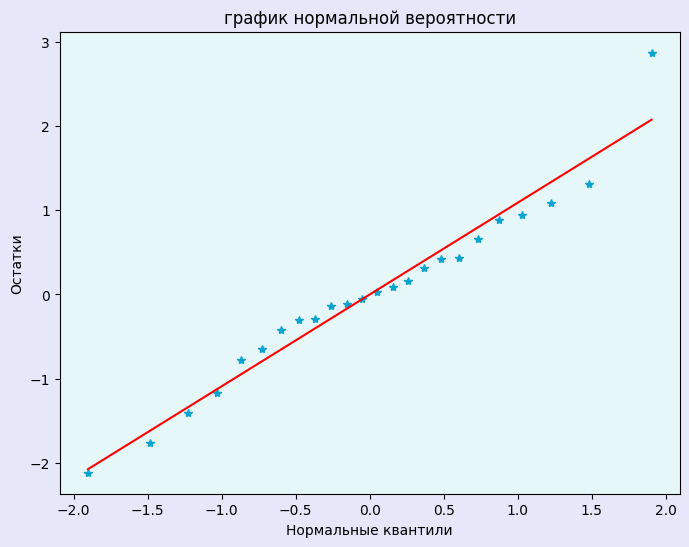

In [15]:
#остатки
residuals = dose_food_ols.resid

plt.figure(figsize=(8, 6))
(stats.probplot(residuals, dist="norm", plot=plt))
plt.title('график нормальной вероятности')
plt.xlabel('Нормальные квантили')
plt.ylabel('Остатки')

#формат графика
plt.gca().get_lines()[0].set_color((0.05, 0.64, 0.82))
plt.gca().get_lines()[0].set_marker('*')
plt.gcf().set_facecolor((0.9, 0.91, 0.98))
plt.gca().set_facecolor((0.9, 0.97, 0.98))

plt.show()

***На графике нельзя однозначно оценить распределены ли данные нормально или нет, так как есть участки,где точки далеко от линнии. Проведем количественную проверку  с помощью тестов Шапиро-Уилкса,  Колмогорова-Смирнова, Андерсона-Дарлинга для этих данных***

In [18]:
import scipy.stats as stats

residuals = dose_food_ols.resid

# Шапиро-Уилк тест
stat, p_value = stats.shapiro(residuals)
print('Шапиро-Уилк тест:')
print('Статистика =', stat)
print('p-value =', p_value)

if p_value > 0.05:
    print('Вывод: residuals, вероятно, имеют нормальное распределение.')
else:
    print('Вывод: residuals, вероятно, не имеют нормального распределения.')

# тест Колмогорова-Смирнова
stat, p_value = stats.kstest(residuals, 'norm')
print('\nтест Колмогорова-Смирнова:')
print('Статистика =', stat)
print('p-value =', p_value)

if p_value > 0.05:
    print('Вывод: residuals, вероятно, имеют нормальное распределение.')
else:
    print('Вывод: residuals, вероятно, не имеют нормального распределения.')

# Тест Андерсона-Дарлинга
stat, critical_values, significance_levels = stats.anderson(residuals, dist='norm')
print('\nТест Андерсона-Дарлинга:')
print('Статистика =', stat)
for i in range(len(critical_values)):
    print(f'Критическое значение при уровне значимости {significance_levels[i]} = {critical_values[i]}')

if stat < critical_values[0]:
    print('Вывод: residuals, вероятно, имеют нормальное распределение.')
else:
    print('Вывод: residuals, вероятно, не имеют нормального распределения.')

Шапиро-Уилк тест:
Статистика = 0.9691275954246521
p-value = 0.6454847455024719
Вывод: residuals, вероятно, имеют нормальное распределение.

тест Колмогорова-Смирнова:
Статистика = 0.09037294554925096
p-value = 0.9794824794129862
Вывод: residuals, вероятно, имеют нормальное распределение.

Тест Андерсона-Дарлинга:
Статистика = 0.28865984814675016
Критическое значение при уровне значимости 15.0 = 0.513
Критическое значение при уровне значимости 10.0 = 0.584
Критическое значение при уровне значимости 5.0 = 0.701
Критическое значение при уровне значимости 2.5 = 0.817
Критическое значение при уровне значимости 1.0 = 0.972
Вывод: residuals, вероятно, имеют нормальное распределение.


***Поскольку все три теста подтверждают гипотезу о нормальности распределения данных, можно сделать вывод, что распределение близко к нормальному.***

***гипотеза Н1 подтверждается результатами, поскольку данные показывают, что более высокие дозы препарата приводят к снижению потребления пищи.***